In [1]:
import os
import json
import h5py
import numpy as np

import robomimic
import robomimic.utils.file_utils as FileUtils
import robomimic.utils.env_utils as EnvUtils
import robomimic.utils.obs_utils as ObsUtils
import imageio
import tqdm

In [2]:
dataset_path_1 = "/home/ns1254/data_robomimic/carl_dataset/mixed_human_original/lift_carl_mix_v5_340.hdf5" 
dataset_path_2 = "/home/ns1254/data_robomimic/carl_dataset/mixed_human_original/lift_i3_155.hdf5"

In [3]:
f1 = h5py.File(dataset_path_1, "r")
f2 = h5py.File(dataset_path_2, "r")

In [4]:
f1_p20i=[b.decode('utf-8') for b in f1['mask']['p20i']]
f2_p20i=[b.decode('utf-8') for b in f2['mask']['p20i']]

len(f1_p20i), len(f2_p20i)

(100, 100)

In [5]:
#sort names
f1_p20i.sort()
f2_p20i.sort()

In [6]:
f1_p20i[:10]

['demo_1',
 'demo_10',
 'demo_100',
 'demo_11',
 'demo_12',
 'demo_13',
 'demo_14',
 'demo_15',
 'demo_16',
 'demo_17']

In [7]:
for demo_name1, demo_name2 in zip(f1_p20i, f2_p20i):
    demo1=f1['data'][demo_name1]
    demo2=f2['data'][demo_name2]
    num_samples1=demo1.attrs['num_samples']
    num_samples2=demo2.attrs['num_samples']

    if num_samples1!=num_samples2:
        print(f"{demo_name1},{demo_name2} {num_samples1}!={num_samples2}")
        

demo_10,demo_10 158!=121
demo_100,demo_101 130!=775
demo_11,demo_102 128!=633
demo_12,demo_103 172!=616
demo_13,demo_104 138!=800
demo_14,demo_105 166!=741
demo_15,demo_106 130!=800
demo_16,demo_107 153!=800
demo_17,demo_108 153!=800
demo_18,demo_109 125!=800
demo_2,demo_110 121!=800
demo_20,demo_111 173!=800
demo_21,demo_112 127!=800
demo_22,demo_113 138!=781
demo_23,demo_114 133!=800
demo_24,demo_115 125!=800
demo_25,demo_116 143!=623
demo_26,demo_117 135!=800
demo_27,demo_118 194!=650
demo_28,demo_119 160!=608
demo_29,demo_12 119!=161
demo_3,demo_120 128!=800
demo_30,demo_13 133!=122
demo_301,demo_14 775!=139
demo_302,demo_15 633!=124
demo_303,demo_16 616!=143
demo_304,demo_17 800!=158
demo_305,demo_18 741!=128
demo_306,demo_19 800!=172
demo_307,demo_2 800!=138
demo_308,demo_20 800!=166
demo_309,demo_21 800!=130
demo_31,demo_22 119!=153
demo_310,demo_23 800!=153
demo_311,demo_24 800!=125
demo_312,demo_25 800!=138
demo_313,demo_26 781!=173
demo_314,demo_27 800!=127
demo_315,demo_28 8

In [8]:
lengths1=[]
lengths2=[]
for i in range(1, 80+1):
    demo_name1=f"demo_{i}"
    demo_name2=f"demo_{i}"
    demo1=f1['data'][demo_name1]
    demo2=f2['data'][demo_name2]
    num_samples1=demo1.attrs['num_samples']
    num_samples2=demo2.attrs['num_samples']

    lengths1.append(num_samples1)
    lengths2.append(num_samples2)

    if num_samples1!=num_samples2:
        print(f"{demo_name1},{demo_name2} {num_samples1}!={num_samples2}")

demo_2,demo_2 121!=138
demo_3,demo_3 128!=125
demo_4,demo_4 138!=122
demo_5,demo_5 161!=117
demo_6,demo_6 122!=155
demo_7,demo_7 139!=204
demo_8,demo_8 124!=140
demo_10,demo_10 158!=121
demo_11,demo_11 128!=138
demo_12,demo_12 172!=161
demo_13,demo_13 138!=122
demo_14,demo_14 166!=139
demo_15,demo_15 130!=124
demo_16,demo_16 153!=143
demo_17,demo_17 153!=158
demo_18,demo_18 125!=128
demo_19,demo_19 138!=172
demo_20,demo_20 173!=166
demo_21,demo_21 127!=130
demo_22,demo_22 138!=153
demo_23,demo_23 133!=153
demo_25,demo_25 143!=138
demo_26,demo_26 135!=173
demo_27,demo_27 194!=127
demo_28,demo_28 160!=138
demo_29,demo_29 119!=133
demo_30,demo_30 133!=143
demo_31,demo_31 119!=135
demo_32,demo_32 141!=194
demo_33,demo_33 138!=160
demo_34,demo_34 128!=119
demo_35,demo_35 122!=133
demo_36,demo_36 156!=119
demo_37,demo_37 130!=141
demo_38,demo_38 142!=138
demo_39,demo_39 127!=128
demo_40,demo_40 123!=156
demo_41,demo_41 121!=130
demo_42,demo_42 130!=142
demo_43,demo_43 132!=127
demo_44,demo_4

In [9]:
print(np.mean(lengths1), np.mean(lengths2))
print(np.std(lengths1), np.std(lengths2))

140.8 140.9875
18.49013250358147 18.435355807523756


In [10]:
np.sum(lengths1), np.sum(lengths2)

(11264, 11279)

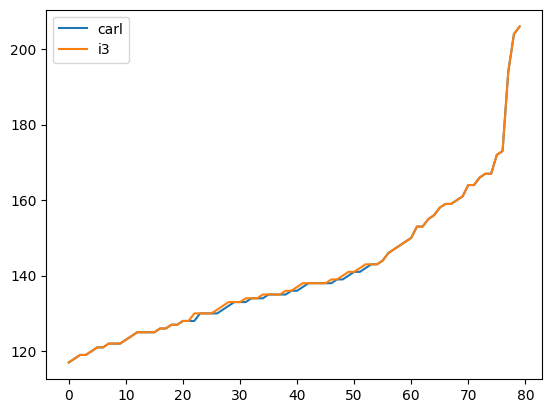

In [11]:
sorted_lengths1=np.sort(lengths1)
sorted_lengths2=np.sort(lengths2)

# compare lengths
import matplotlib.pyplot as plt
plt.plot(sorted_lengths1, label="carl")
plt.plot(sorted_lengths2, label="i3")
plt.legend()

In [3]:

demos = list(f1["data"].keys())

lengths=[]
demos_minmax={}
for demo_name in demos:
    demo=f1['data'][demo_name]
    num_samples=demo.attrs['num_samples']
    lengths.append(num_samples)

    action=f1['data'][demo_name]['actions']
    action=np.array(action) 
    demos_minmax[demo_name] = (np.min(action, axis=0), np.max(action, axis=0))


lengths=np.array(lengths)

print('Number of demos: ', len(demos))
print('Max length: ', np.max(lengths))
print('Min length: ', np.min(lengths))
print('Mean length: ', np.mean(lengths))
print('Median length: ', np.median(lengths))

print()

for key in f1['mask'].keys():
    print(key, f1['mask'][key])

Number of demos:  155
Max length:  800
Min length:  116
Mean length:  361.96774193548384
Median length:  149.0

expert <HDF5 dataset "expert": shape (100,), type "|S16">
int3 <HDF5 dataset "int3": shape (55,), type "|S16">
p20i <HDF5 dataset "p20i": shape (100,), type "|S16">
p40i <HDF5 dataset "p40i": shape (100,), type "|S16">


In [4]:
np.set_printoptions(precision=4, suppress=True)

In [5]:
mins,maxs=[],[]
for demo_name in demos_minmax.keys():
    min,max= demos_minmax[demo_name]
    mins.append(min)
    maxs.append(max)

mins=np.min(mins, axis=0)
maxs=np.max(maxs, axis=0) 
print('mins: ', mins)
print('maxs: ', maxs)

mins:  [-1. -1. -1. -1. -1. -1. -1.]
maxs:  [ 1.  1.  1. -1. -1.  1.  1.]


In [6]:
is_normalized='mins' in f1.keys()
print(f'is_normalized: {is_normalized}')

if is_normalized:
    print('mins: ', np.array(f1['mins']))
    print('maxs: ', np.array(f1['maxs']))

is_normalized: True
mins:  [-0.8923 -1.0068 -1.1138  0.      0.     -0.45   -1.    ]
maxs:  [1.0375 1.2789 1.125  0.     0.     0.45   1.    ]


In [7]:
for key in f1['mask'].keys():
    # print(key, f['mask'][key])
    demo_names=[b.decode('utf-8') for b in f1['mask'][key] ]

    lengths=[]
    demos_minmax={}
    for demo_name in demo_names:
        demo=f1['data'][demo_name]
        num_samples=demo.attrs['num_samples']
        lengths.append(num_samples) 
    lengths=np.array(lengths)

    print(f'mask: {key} ({len(lengths)}) length-min: {np.min(lengths)} mean: {np.mean(lengths)} max: {np.max(lengths)} unique: {np.unique(lengths).shape}')

mask: expert (100) length-min: 116 mean: 139.51 max: 206 unique: (51,)
mask: int3 (55) length-min: 608 mean: 766.4363636363636 max: 800 unique: (22,)
mask: p20i (100) length-min: 117 mean: 263.06 max: 800 unique: (56,)
mask: p40i (100) length-min: 117 mean: 390.25 max: 800 unique: (56,)


In [8]:
# mask: p20i (100) length-min: 116 mean: 263.92 max: 800 unique: (59,)

In [9]:
f1.close()